## Importing the necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Creating a dataset of 3 features

In [29]:
x = []
y = []
z = []
for i in range(0, 10):
    x.append(np.random.randn())
    y.append(np.random.randn())
    z.append(np.random.randn())

x = np.array(x)
y = np.array(y)
z = np.array(z)

In [30]:
data = pd.DataFrame({"X":x, "Y":y, "Z":z})
data

,X,Y,Z
0,0.040675,0.652237,-1.411743
1,-0.030712,-0.798396,0.291772
2,-0.676077,0.662759,-0.182985
3,1.513223,-0.475908,-1.153397
4,1.191305,0.621591,-1.255794
5,-0.269755,0.837429,0.881789
6,2.122309,0.775677,-0.015890
7,0.716357,-0.478043,1.349300
8,-0.014451,-1.126478,-0.284326
9,-0.837846,-0.432871,0.920210


### Function to compute covariance 

In [31]:
def covariance(a, b):
    p = 0
    for i in range(0, len(a)):
        p = p + (a[i]-np.mean(a))*(b[i]-np.mean(b))

    return p/len(a)       

### Creating covariance matrix

In [32]:
cov_matrix = np.empty([3, 3])

cov_matrix[0, 0] = covariance(x, x)
cov_matrix[1, 1] = covariance(y, y)
cov_matrix[2, 2] = covariance(z, z)
cov_matrix[0, 1] = cov_matrix[1, 0] = covariance(x, y)
cov_matrix[0, 2] = cov_matrix[2, 0] = covariance(x, z)
cov_matrix[1, 2] = cov_matrix[2, 1] = covariance(y, z)

cov_matrix




array([[ 0.85510301,  0.09907892, -0.29326145],
       [ 0.09907892,  0.50971134, -0.148316  ],
       [-0.29326145, -0.148316  ,  0.84708735]])

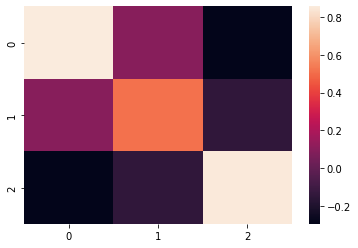

In [33]:
hm = sn.heatmap(cov_matrix)
plt.show()

### Computing eigen vectors and eigen values of the covariance matrix

In [34]:
vals, vector_matrix = np.linalg.eig(cov_matrix)
print(vals)
print(vector_matrix)

[1.18941811 0.5693154  0.45316818]
[[ 0.67931987  0.73164153  0.05679066]
 [ 0.24960392 -0.30314013  0.919676  ]
 [-0.69008868  0.61057901  0.38854971]]


### Visualising amount of information in each principal component

Text(0, 0.5, 'Explained variance (%)')

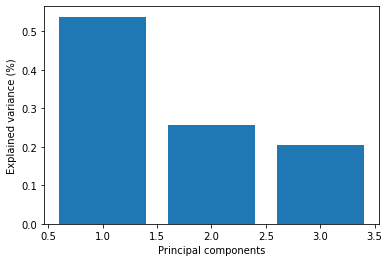

In [48]:
sorted_vals = np.sort(vals)/np.sum(vals)
plt.bar([3, 2, 1], sorted_vals)
plt.xlabel("Principal components")
plt.ylabel("Explained variance (%)")

In [49]:
print(sorted_vals)

[0.20487718 0.2573873  0.53773552]


In [37]:
for i in range(0, len(vals)):
    if vals[i]== np.max(vals):
        PC1 = vector_matrix[:, i]

PC1

array([ 0.67931987,  0.24960392, -0.69008868])

In [38]:
PC2 = vector_matrix[:, 1]
PC2

array([ 0.73164153, -0.30314013,  0.61057901])

### Principal component 1 explains 53.7 percent variation in data

### Principal component 2 explains 25.7 percent variation in data

### Principal component 3 explains only 20.4 percent variation in data

## Therefore, we will eliminate PC3 and create a feature vector from PC1 and PC2 only

In [39]:
feature_matrix = np.array([PC1, PC2])
feature_matrix

array([[ 0.67931987,  0.24960392, -0.69008868],
       [ 0.73164153, -0.30314013,  0.61057901]])

In [40]:
data_matrix = np.array([data['X'], data['Y'], data['Z']])
data_matrix

array([[ 0.04067505, -0.03071234, -0.67607688,  1.51322306,  1.1913049 ,
        -0.26975485,  2.1223089 ,  0.7163574 , -0.01445138, -0.83784558],
       [ 0.65223677, -0.7983959 ,  0.66275891, -0.47590752,  0.62159061,
         0.83742879,  0.77567661, -0.47804297, -1.1264782 , -0.43287086],
       [-1.41174323,  0.29177182, -0.18298483, -1.1533973 , -1.25579355,
         0.88178852, -0.01588986,  1.34929961, -0.28432573,  0.92021012]])

## final dataset = (feature vector)*(data)

In [41]:
final_data = np.matmul(feature_matrix, data_matrix)

In [42]:
final_data

array([[ 1.16466025, -0.42149468, -0.16756948,  1.70512054,  1.83103747,
        -0.5827366 ,  1.64630395, -0.56382197, -0.09478052, -1.31223801],
       [-1.02994037,  0.39770517, -0.80728144,  0.54716333, -0.0835821 ,
         0.08717943,  1.3079286 ,  1.49288485,  0.1573042 ,  0.08007889]])

In [45]:
x_final = final_data[0, :]
y_final = final_data[1, :]
df = pd.DataFrame({"X":x_final, "Y":y_final})
df

,X,Y
0,1.164660,-1.029940
1,-0.421495,0.397705
2,-0.167569,-0.807281
3,1.705121,0.547163
4,1.831037,-0.083582
5,-0.582737,0.087179
6,1.646304,1.307929
7,-0.563822,1.492885
8,-0.094781,0.157304
9,-1.312238,0.080079
